In [1]:
from matplotlib import pyplot as plt
# import b2plot as bp
# plt.style.use('belle2_modern')
# plt.style.use('belle2')


# basic setup of the notebook

import numpy as np
import pandas as pd

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

iminuit version: 2.15.2


In [2]:
# plt.style.available
# plt.style.use('belle2_modern')
px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

In [3]:
from hist.get_data import get_data

Welcome to JupyROOT 6.26/04


In [4]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe
from matplotlib import pyplot as plt
import numpy as np
from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon
# from scipy.stats import truncnorm

In [5]:
def crystalball_pdf(x, beta, m, loc, scale):
    
    return crystalball.pdf(x, beta, m, loc, scale)

In [6]:
def signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return s, func

In [7]:
def extended_bin_signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return func

In [8]:
def gauss_signal_crystalball(x, s1, s2, beta, m, loc, scale, mu, sigma):
    func = s1 * crystalball.pdf(x, beta, m, loc, scale) + s2*truncnorm.pdf(x,*xr, mu, sigma)
    return s1+s2, func

In [9]:
from hist.get_data import get_data_in_np

In [10]:
def extended_gauss_crystalball(x, s1, s2, alpha, n, CB_mu, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, CB_mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

In [11]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

# Extract Data

In [12]:
# general_file = '/media/jykim/ssd_T5/storage/01_recon/vector/v2_extraction_expert_E_0_3_signalMC_recon_mdst_vector.root'


general_file = '/media/jykim/ssd_T5/storage/01_recon/vector/train_v2_extraction_pi0veto_signalMC_recon_mdst_vector.root'

In [13]:
variables=['D0_M']

In [14]:
phi_file = general_file.replace("vector","phi")
rho_file = general_file.replace("vector","rho")
antiKstar_file = general_file.replace("vector","antiKstar")
omega_file = general_file.replace("vector","omega")

In [15]:
base_filter = 'Pi0_Prob<0.9'

In [16]:
half_1M_1_phi = get_data_in_np(file=phi_file, tree='phi', base_filter=base_filter,variables=variables)
half_1M_1_rho = get_data_in_np(file=rho_file, tree='rho', base_filter=base_filter,variables=variables)
half_1M_1_antiKstar = get_data_in_np(file=antiKstar_file, tree='antiKstar', base_filter=base_filter,variables=variables)
half_1M_1_omega = get_data_in_np(file=omega_file, tree='omega', base_filter=base_filter,variables=variables)

In [17]:
df_describe = pd.DataFrame(half_1M_1_phi)
df_describe.describe()


,D0_M
count,38310.000000
mean,1.858386
std,0.021628
min,1.666544
25%,1.849702
50%,1.861035
75%,1.870583
max,2.064014


# After pi0 veto ( CB + Gaussian )

## Extended unbinned MLE

In [74]:
PDF = same_mu_extended_gauss_crystalball

### phi

In [75]:
mode = 'phi'
dataset = half_1M_1_phi['D0_M']

In [76]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=35000,s2=3000, alpha=1, n=9, CB_sigma=0.05, mu=1.86, sigma=0.05)

In [77]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.305e+05                 │              Nfcn = 280              │
│ EDM = 0.000132 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.45e3  │  0.20e3   │            │            │    0    │         │       │
│ 1 │ s2       │    860    │    70     │            │            │    0    │         │       │
│ 2 │ alpha    │   1.006   │   0.025   │            │            │    0    │         │       │
│ 3 │ n        │    9.2    │    1.1    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0689   │  0.0033   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.15e+04 -3.68e+03    0.0233     -5.82   0.00199  0.000154    0.0821 │
│       s2 │ -3.68e+03  4.54e+03    -0.162      8.36  -0.00219  0.000334    -0.076 │
│    alpha │    0.0233    -0.162  0.000615   -0.0229   1.5e-06 -1.93e-06 -2.65e-05 │
│        n │     -5.82      8.36   -0.0229       1.2 -3.21e-05  5.04e-05   0.00187 │
│ CB_sigma │   0.00199  -0.00219   1.5e-06 -3.21e-05  9.97e-09  -7.3e-09  3.28e-08 │
│       mu │  0.000154  0.000334 -1.93e-06  5.04e-05  -7.3e-09  1.38e-08  3.54e-08 │
│    sigma │    0.0821    -0.076 -2.65e-05   0.00187  3.28e-08  3.54e-08  1.08e-05 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [78]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.305e+05                 │             Nfcn = 1335              │
│ EDM = 0.000132 (Goal: 0.0002)    │            time = 0.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.45e3  │  0.20e3   │  -0.20e3   │   0.20e3   │    0    │         │       │
│ 1 │ s2       │    860    │    70     │    -70     │     70     │    0    │         │       │
│ 2 │ alpha    │   1.006   │   0.025   │   -0.024   │   0.025    │    0    │         │       │
│ 3 │ n        │    9.2    │    1.1    │    -1.0    │    1.3     │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │  -0.00012  │  0.00012   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0689   │  0.0033   │  -0.0034   │   0.0032   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.2e3   │   0.2e3   │    -70    │    70     │  -0.024   │   0.025   │   -1.0    │    1.3    │  -0.1e-3  │  0.1e-3   │ -0.12e-3  │  0.12e-3  │  -0.0034  │  0.0032   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.15e+04 -3.68e+03    0.0233     -5.82   0.00199  0.000154    0.0821 │
│       s2 │ -3.68e+03  4.54e+03    -0.162      8.36  -0.00219  0.000334  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


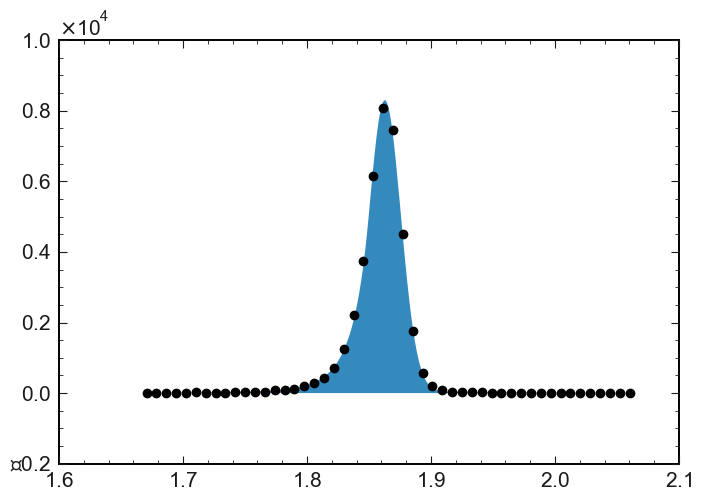

In [79]:
COST.visualize(m.values)

In [80]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/half_1M_1_vector_after_pi0veto.png'

In [81]:
this_plot_location = general_plot_location.replace("vector",mode)


In [82]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 38310
s1 + s2 = 37451.97740251737 + 858.80326862414 = 38310.78067114151


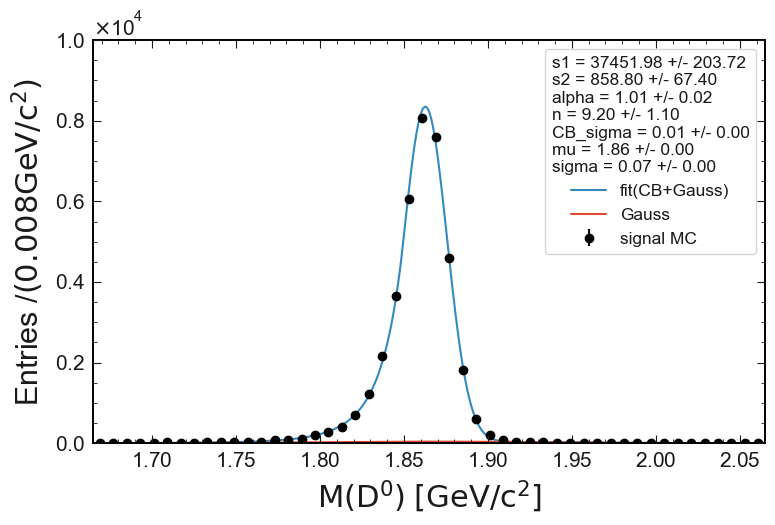

In [90]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")


# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [28]:
len(xe)

51

### rho

In [29]:
mode = 'rho'
dataset = half_1M_1_rho['D0_M']

In [30]:
df_describe = pd.DataFrame(half_1M_1_rho)
df_describe.describe()

,D0_M
count,65307.000000
mean,1.856203
std,0.029321
min,1.665198
25%,1.845809
50%,1.859820
75%,1.871211
max,2.064887


In [31]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=62000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [32]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.624e+06                 │              Nfcn = 329              │
│ EDM = 0.000103 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  62.44e3  │  0.22e3   │            │            │    0    │         │       │
│ 1 │ s2       │  2.87e3   │  0.11e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.010   │   0.017   │            │            │    0    │         │       │
│ 3 │ n        │    7.2    │    0.4    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 15.20e-3  │  0.09e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86188  │  0.00011  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0855   │  0.0016   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.98e+04 -8.64e+03    0.0295      1.37   0.00503  -0.00208    0.0671 │
│       s2 │ -8.64e+03  1.24e+04    -0.177      10.5  -0.00299  0.000471   -0.0608 │
│    alpha │    0.0295    -0.177  0.000303  -0.00606  1.04e-06 -1.23e-06 -3.35e-06 │
│        n │      1.37      10.5  -0.00606      0.19  -1.4e-05   1.8e-05  0.000184 │
│ CB_sigma │   0.00503  -0.00299  1.04e-06  -1.4e-05  8.42e-09 -5.98e-09  2.02e-08 │
│       mu │  -0.00208  0.000471 -1.23e-06   1.8e-05 -5.98e-09  1.13e-08  2.49e-09 │
│    sigma │    0.0671   -0.0608 -3.35e-06  0.000184  2.02e-08  2.49e-09  2.64e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [33]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.624e+06                 │             Nfcn = 1728              │
│ EDM = 0.000103 (Goal: 0.0002)    │            time = 1.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  62.44e3  │  0.22e3   │  -0.27e3   │   0.27e3   │    0    │         │       │
│ 1 │ s2       │  2.87e3   │  0.11e3   │  -0.11e3   │   0.12e3   │    0    │         │       │
│ 2 │ alpha    │   1.010   │   0.017   │   -0.018   │   0.018    │    0    │         │       │
│ 3 │ n        │    7.2    │    0.4    │    -0.4    │    0.5     │    0    │   50    │       │
│ 4 │ CB_sigma │ 15.20e-3  │  0.09e-3  │  -0.09e-3  │  0.09e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86188  │  0.00011  │  -0.00011  │  0.00011   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0855   │  0.0016   │  -0.0017   │   0.0016   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.27e3  │  0.27e3   │  -0.11e3  │  0.12e3   │  -0.017   │   0.018   │   -0.4    │    0.5    │ -0.09e-3  │  0.09e-3  │ -0.11e-3  │  0.11e-3  │  -0.0017  │  0.0016   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.98e+04 -8.64e+03    0.0295      1.37   0.00503  -0.00208    0.0671 │
│       s2 │ -8.64e+03  1.24e+04    -0.177      10.5  -0.00299  0.000471  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


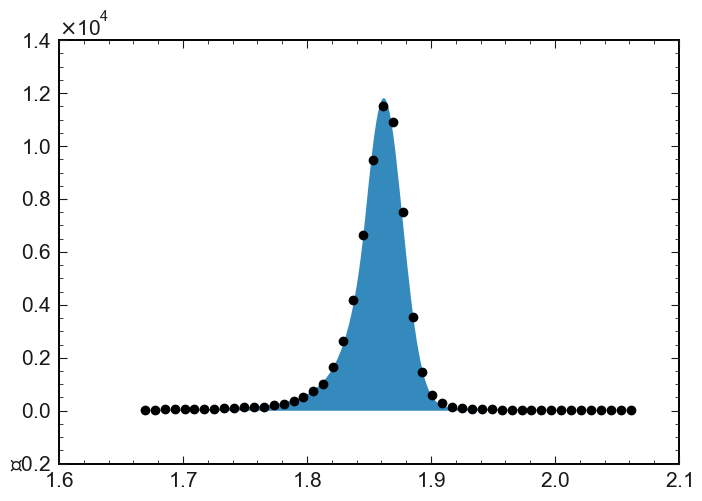

In [34]:
COST.visualize(m.values)

In [35]:
this_plot_location = general_plot_location.replace("vector",mode)


In [36]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 65307
s1 + s2 = 62437.18933740196 + 2867.783642763026 = 65304.97298016498


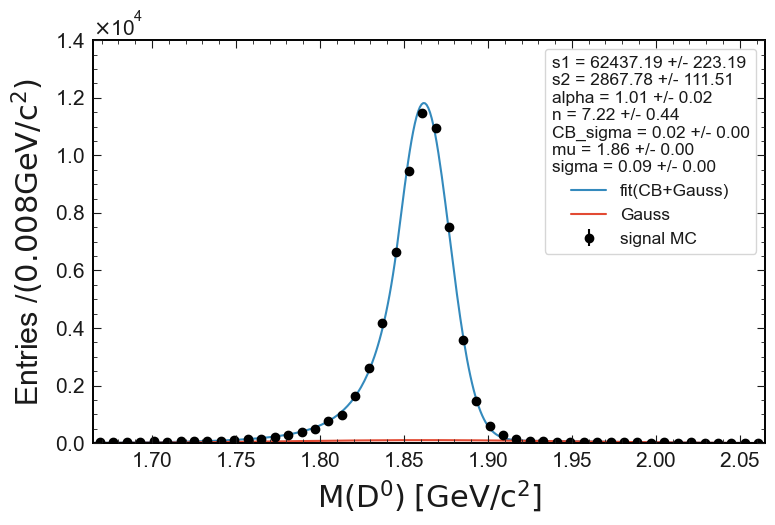

In [37]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### antiKstar

In [38]:
mode = 'antiKstar'
dataset = half_1M_1_antiKstar['D0_M']

In [39]:
df_describe = pd.DataFrame(half_1M_1_antiKstar)
df_describe.describe()

,D0_M
count,50180.000000
mean,1.857291
std,0.025005
min,1.667223
25%,1.847342
50%,1.860321
75%,1.870917
max,2.064459


In [40]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=50000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [41]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.232e+06                 │              Nfcn = 222              │
│ EDM = 0.000303 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  48.65e3  │  0.23e3   │            │            │    0    │         │       │
│ 1 │ s2       │  1.53e3   │  0.09e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.029   │   0.022   │            │            │    0    │         │       │
│ 3 │ n        │    8.8    │    0.9    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 14.59e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86198  │  0.00012  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0769   │  0.0023   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  5.35e+04 -6.52e+03      0.33     -19.4   0.00308 -0.000992    0.0689 │
│       s2 │ -6.52e+03  8.03e+03    -0.211      14.9  -0.00283  0.000315   -0.0787 │
│    alpha │      0.33    -0.211  0.000503   -0.0158  1.42e-06 -1.74e-06 -1.15e-05 │
│        n │     -19.4      14.9   -0.0158     0.731 -2.79e-05  3.89e-05  0.000699 │
│ CB_sigma │   0.00308  -0.00283  1.42e-06 -2.79e-05  1.02e-08 -7.16e-09  2.69e-08 │
│       mu │ -0.000992  0.000315 -1.74e-06  3.89e-05 -7.16e-09  1.35e-08  1.93e-08 │
│    sigma │    0.0689   -0.0787 -1.15e-05  0.000699  2.69e-08  1.93e-08  5.26e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [42]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.232e+06                 │             Nfcn = 1576              │
│ EDM = 0.000303 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  48.65e3  │  0.23e3   │  -0.23e3   │   0.23e3   │    0    │         │       │
│ 1 │ s2       │  1.53e3   │  0.09e3   │  -0.09e3   │   0.09e3   │    0    │         │       │
│ 2 │ alpha    │   1.029   │   0.022   │   -0.022   │   0.023    │    0    │         │       │
│ 3 │ n        │    8.8    │    0.9    │    -0.8    │    1.0     │    0    │   50    │       │
│ 4 │ CB_sigma │ 14.59e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86198  │  0.00012  │  -0.00012  │  0.00012   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0769   │  0.0023   │  -0.0022   │   0.0023   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.23e3  │  0.23e3   │    -90    │    90     │  -0.022   │   0.023   │   -0.8    │    1.0    │  -0.1e-3  │  0.1e-3   │ -0.12e-3  │  0.12e-3  │  -0.0022  │  0.0023   │
│  Valid   │   True    │   False   │   True    │   True    │   True    │   True    │   True    │   True    │   False   │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  5.35e+04 -6.52e+03      0.33     -19.4   0.00308 -0.000992    0.0689 │
│       s2 │ -6.52e+03  8.03e+03    -0.211      14.9  -0.00283  0.000315  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


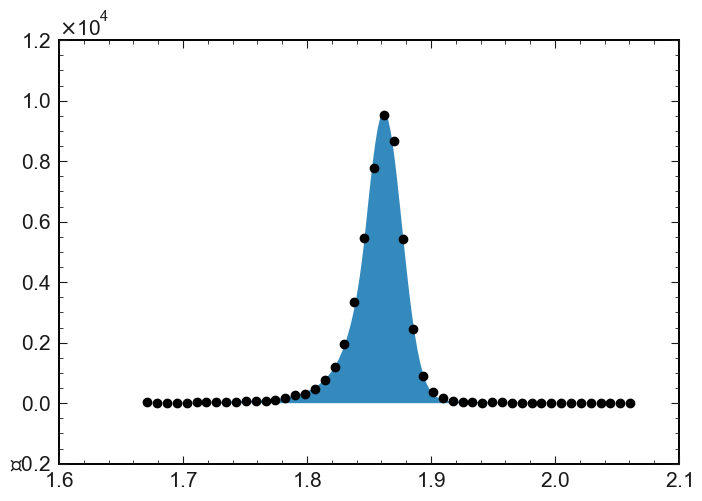

In [43]:
COST.visualize(m.values)

In [44]:
this_plot_location = general_plot_location.replace("vector",mode)


In [45]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 50180
s1 + s2 = 48650.67474705255 + 1529.1258777823305 = 50179.80062483488


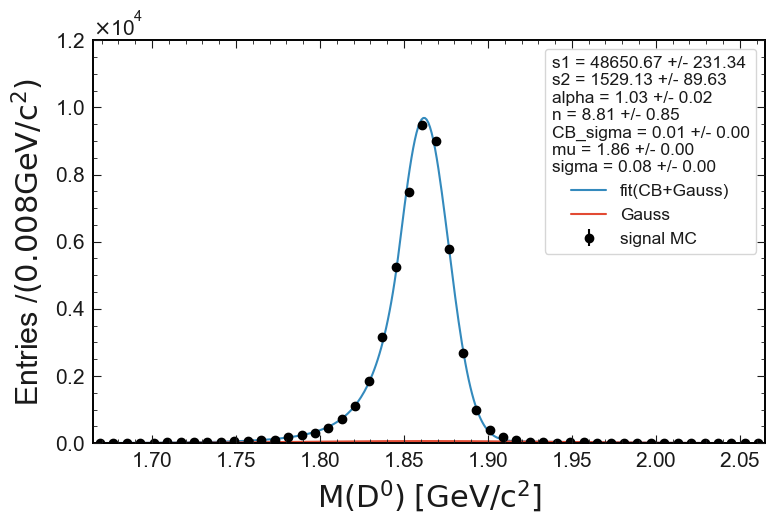

In [46]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### omega

In [47]:
mode = 'omega'
dataset = half_1M_1_omega['D0_M']

In [48]:
df_describe = pd.DataFrame(half_1M_1_omega)
df_describe.describe()

,D0_M
count,28012.000000
mean,1.855199
std,0.031490
min,1.665790
25%,1.842701
50%,1.858218
75%,1.871299
max,2.063333


In [49]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=25000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [50]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.422e+05                 │              Nfcn = 293              │
│ EDM = 0.000519 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  26.24e3  │  0.18e3   │            │            │    0    │         │       │
│ 1 │ s2       │  1.77e3   │  0.10e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.01    │   0.04    │            │            │    0    │         │       │
│ 3 │ n        │   12.3    │    3.5    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 17.40e-3  │  0.17e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86028  │  0.00019  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0822   │  0.0020   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  3.24e+04 -7.72e+03     0.737      -105   0.00494  -0.00084    0.0721 │
│       s2 │ -7.72e+03  9.71e+03    -0.798       114  -0.00547   0.00111   -0.0696 │
│    alpha │     0.737    -0.798   0.00153    -0.122  4.29e-06 -5.05e-06 -1.95e-05 │
│        n │      -105       114    -0.122      12.4 -0.000244  0.000288   0.00228 │
│ CB_sigma │   0.00494  -0.00547  4.29e-06 -0.000244  2.89e-08 -2.13e-08     3e-08 │
│       mu │  -0.00084   0.00111 -5.05e-06  0.000288 -2.13e-08  3.73e-08  2.14e-08 │
│    sigma │    0.0721   -0.0696 -1.95e-05   0.00228     3e-08  2.14e-08  4.08e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [51]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.422e+05                 │             Nfcn = 1963              │
│ EDM = 0.000519 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  26.24e3  │  0.18e3   │  -0.18e3   │   0.18e3   │    0    │         │       │
│ 1 │ s2       │  1.77e3   │  0.10e3   │  -0.09e3   │   0.10e3   │    0    │         │       │
│ 2 │ alpha    │   1.007   │   0.039   │   -0.029   │   0.030    │    0    │         │       │
│ 3 │ n        │   12.3    │    3.5    │    -2.0    │    3.0     │    0    │   50    │       │
│ 4 │ CB_sigma │ 17.40e-3  │  0.17e-3  │  -0.16e-3  │  0.16e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86028  │  0.00019  │  -0.00019  │  0.00019   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0822   │  0.0020   │  -0.0020   │   0.0020   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.18e3  │  0.18e3   │    -90    │    100    │  -0.029   │   0.030   │    -2     │     3     │ -0.16e-3  │  0.16e-3  │ -0.19e-3  │  0.19e-3  │  -0.002   │   0.002   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  3.24e+04 -7.72e+03     0.737      -105   0.00494  -0.00084    0.0721 │
│       s2 │ -7.72e+03  9.71e+03    -0.798       114  -0.00547   0.00111  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


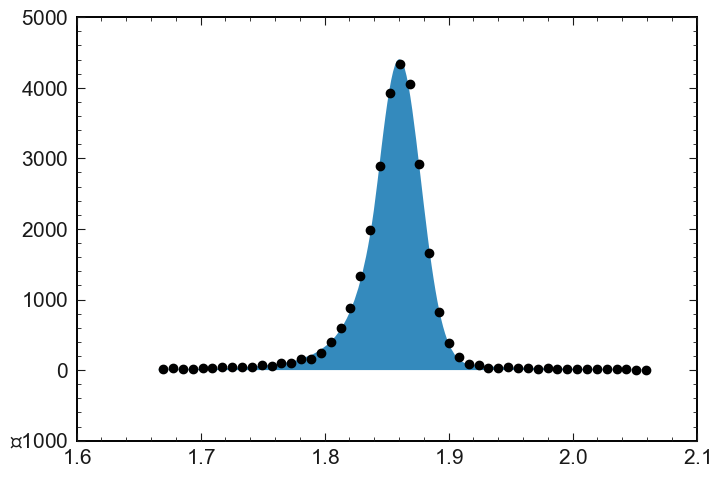

In [52]:
COST.visualize(m.values)

In [53]:
this_plot_location = general_plot_location.replace("vector",mode)


In [54]:
this_plot_location

'/home/jykim/nas/plots/signalMC/omega/half_1M_1_omega_after_pi0veto.png'

In [55]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 28012
s1 + s2 = 26237.74121513926 + 1774.019844314625 = 28011.761059453886


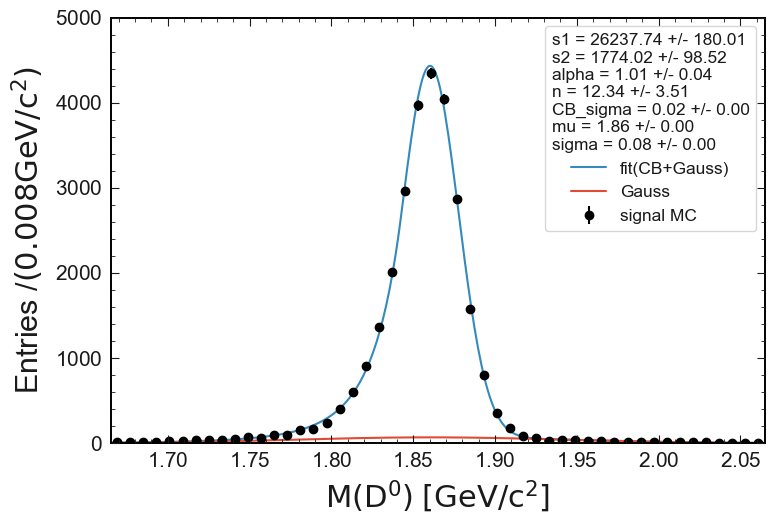

In [56]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# After pi0 veto ( CB )

## Unbinned

In [52]:
def crystalball_pdf(x, alpha, n, CB_mu, CB_sigma):
    
    return crystalball.pdf(x, alpha, n, CB_mu, CB_sigma)



In [57]:


# PDF = unbinned_crystalball_pdf

In [58]:
# crystalball.pdf(x, alpha, n, CB_mu, CB_sigma)

### phi (CB)

In [53]:
mode = 'phi'
dataset = half_1M_1_phi['D0_M']

In [54]:
PDF = crystalball_pdf

In [55]:
COST = cost.UnbinnedNLL(dataset, PDF)
m = Minuit(COST, alpha=1.006, n=9.2, CB_mu=1.86,CB_sigma=0.012)

In [56]:
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma"]=(0, None)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["CB_mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.942e+05                 │              Nfcn = 163              │
│ EDM = 3.18e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha    │   1.405   │   0.024   │            │            │    0    │         │       │
│ 1 │ n        │   4.80    │   0.23    │            │            │    0    │   50    │       │
│ 2 │ CB_mu    │  1.86145  │  0.00010  │            │            │   1.8   │   1.9   │       │
│ 3 │ CB_sigma │ 16.11e-3  │  0.08e-3  │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────┐
│          │     alpha         n     CB_mu  CB_sigma │
├──────────┼─────────────────────────────────────────┤
│    alpha │  0.000555  -0.00433 -9.76e-07  8.14e-07 │
│        n │  -0.00433    0.0518  5.05e-06 -2.88e-06 │
│    CB_mu │ -9.76e-07  5.05e-06  1.04e-08 -3.06e-09 │
│ CB_sigma │  8.14e-07 -2.88e-06 -3.06e-09  6.52e-09 │
└──────────┴─────────────────────────────────────────┘

In [57]:
m.interactive()

In [58]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.942e+05                 │              Nfcn = 385              │
│ EDM = 3.18e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha    │   1.405   │   0.024   │   -0.024   │   0.024    │    0    │         │       │
│ 1 │ n        │   4.80    │   0.23    │   -0.22    │    0.24    │    0    │   50    │       │
│ 2 │ CB_mu    │  1.86145  │  0.00010  │  -0.00010  │  0.00010   │   1.8   │   1.9   │       │
│ 3 │ CB_sigma │ 16.11e-3  │  0.08e-3  │  -0.08e-3  │  0.08e-3   │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │         alpha         │           n           │         CB_mu         │       CB_sigma        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.024   │   0.024   │   -0.22   │   0.24    │  -0.1e-3  │  0.1e-3   │ -0.08e-3  │  0.08e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬─────────────────────────────────────────┐
│          │     alpha         n     CB_mu  CB_sigma │
├──────────┼─────────────────────────────────────────┤
│    alpha │  0.000555  -0.00433 -9.76e-07  8.14e-07 │
│        n │  -0.00433    0.0518  5.05e-06 -2.88e-06 │
│    CB_mu │ -9.76e-07  5.05e-06  1.04e-08 -3.06e-09 │
│ CB_sigma │  8.14e-07 -2.88e-06 -3.06e-09  6.52e-09 │
└──────────┴─────────────────────────────────────────┘

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


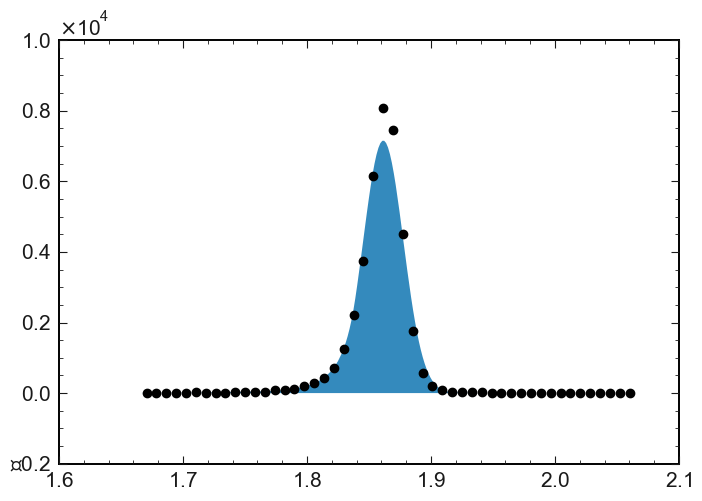

In [59]:
COST.visualize(m.values)

In [60]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/CB_half_1M_1_vector_after_pi0veto.png'

In [61]:
this_plot_location = general_plot_location.replace("vector",mode)


In [62]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 38310


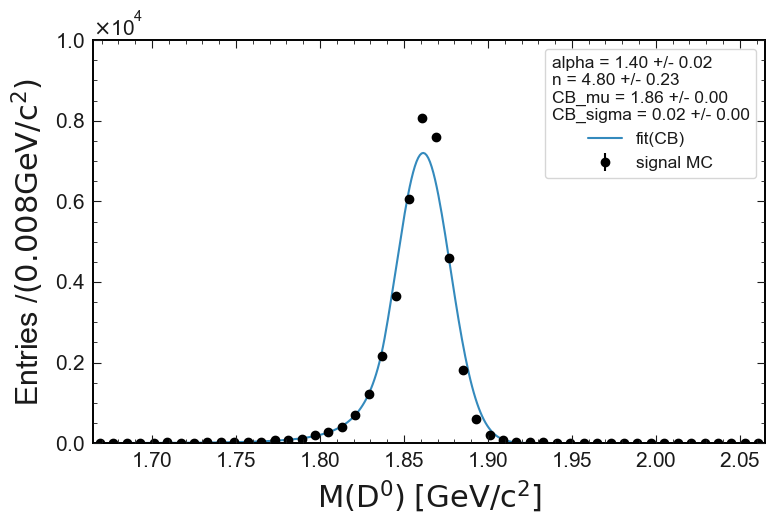

In [64]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")
plt.plot(xm, crystalball_pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### phi (CB + Gaussian)

In [159]:
def unbinned_crystalball_pdf(x, z, alpha, n, mu, CB_sigma, sigma):
    
    func = z * crystalball.pdf(x, alpha, n, mu, CB_sigma) + (1-z) * norm.pdf(x, mu, sigma)
    
    return func

In [160]:
dataset

ndarray([1.87958336, 1.86690187, 1.74361265, ..., 1.8513068 , 1.86122262,
         1.86981761])

In [176]:
PDF = unbinned_crystalball_pdf

mode = 'phi'
dataset = half_1M_1_phi['D0_M']

COST = cost.UnbinnedNLL(dataset, PDF)
m = Minuit(COST, z=0.9, alpha=1.01,n=15, mu=1.86,CB_sigma=0.02, sigma=0.08)

In [177]:
m.limits["n"]=(0,30)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.10)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.limits["z"]=(0,1)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.969e+05                 │              Nfcn = 383              │
│ EDM = 3.68e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z        │   0.181   │   0.008   │            │            │    0    │    1    │       │
│ 1 │ alpha    │   0.936   │   0.027   │            │            │    0    │         │       │
│ 2 │ n        │   30.0    │    1.1    │            │            │    0    │   30    │       │
│ 3 │ mu       │  1.86081  │  0.00009  │            │            │   1.8   │   1.9   │       │
│ 4 │ CB_sigma │  31.4e-3  │  0.7e-3   │            │            │    0    │   0.1   │       │
│ 5 │ sigma    │ 13.52e-3  │  0.11e-3  │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────┐
│          │         z     alpha         n        mu  CB_sigma     sigma │
├──────────┼─────────────────────────────────────────────────────────────┤
│        z │  6.29e-05  6.87e-06  1.38e-08  2.18e-07 -4.25e-06 -6.64e-07 │
│    alpha │  6.87e-06  0.000725  1.64e-06    -3e-07  9.17e-06 -2.86e-07 │
│        n │  1.38e-08  1.64e-06  9.97e-06  -5.4e-10  8.63e-09 -1.92e-10 │
│       mu │  2.18e-07    -3e-07  -5.4e-10  7.94e-09 -1.85e-08  -3.2e-09 │
│ CB_sigma │ -4.25e-06  9.17e-06  8.63e-09 -1.85e-08  5.45e-07  4.05e-08 │
│    sigma │ -6.64e-07 -2.86e-07 -1.92e-10  -3.2e-09  4.05e-08  1.24e-08 │
└──────────┴─────────────────────────────────────────────────────────────┘

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


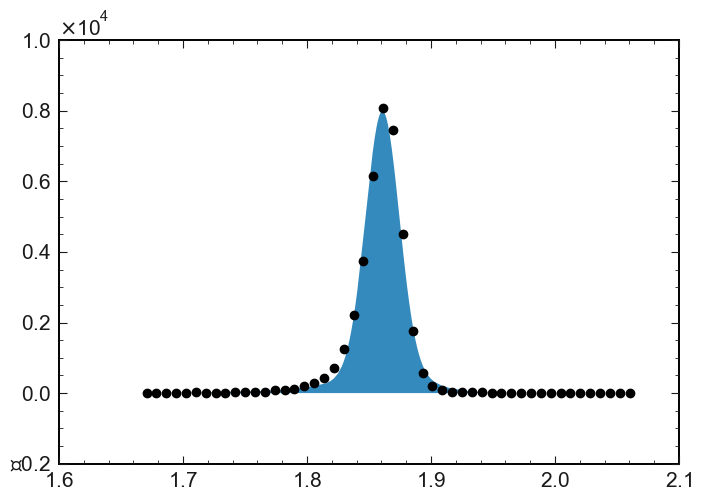

In [178]:
COST.visualize(m.values)

In [179]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.969e+05                 │             Nfcn = 1101              │
│ EDM = 3.68e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z        │   0.181   │   0.008   │   -0.008   │   0.008    │    0    │    1    │       │
│ 1 │ alpha    │   0.936   │   0.027   │   -0.026   │   0.028    │    0    │         │       │
│ 2 │ n        │29.9999978 │ 1.1095156 │ -1.0830865 │ 0.0000022  │    0    │   30    │       │
│ 3 │ mu       │  1.86081  │  0.00009  │  -0.00009  │  0.00009   │   1.8   │   1.9   │       │
│ 4 │ CB_sigma │  31.4e-3  │  0.7e-3   │  -0.7e-3   │   0.8e-3   │    0    │   0.1   │       │
│ 5 │ sigma    │ 13.52e-3  │  0.11e-3  │  -0.11e-3  │  0.11e-3   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           z           │         alpha         │           n           │          mu           │       CB_sigma        │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.008   │   0.008   │  -0.026   │   0.028   │-1083086.5e-6│  2.2e-6   │ -0.09e-3  │  0.09e-3  │  -0.7e-3  │  0.8e-3   │ -0.11e-3  │  0.11e-3  │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   True    │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬─────────────────────────────────────────────────────────────┐
│          │         z     alpha         n        mu  CB_sigma     sigma │
├──────────┼─────────────────────────────────────────────────────────────┤
│        z │  6.29e-05  6.87e-06  1.38e-08  2.18e-07 -4.25e-06 -6.64e-07 │
│    alpha │  6.87e-06  0.000725  1.64e-06    -3e-07  9.17e-06 -2.86e-07 │
│        n │  1.38e-08  1.64e-06  9.97e-06  -5.4e-10  8.63e-09 -1.92e-10 │
│       mu │  2.18e-07    -3e-07  -5.4e-10  7.94e-09 -1.85e-08  -3.2e-09 │
│ CB_sigma │ -4.25e-06  9.17e-06  8.63e-09 -1.85e-08  5.45e-07  4.05e-08 │
│    sigma │ -6.64e-07 -2.86e-07 -1.92e-10  -3.2e-09  4.05e-08  1.24e-08 │
└──────────┴────────────────────────────────────

In [180]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/CB_half_1M_1_vector_after_pi0veto.png'

In [181]:
this_plot_location = general_plot_location.replace("vector",mode)


In [182]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 38310


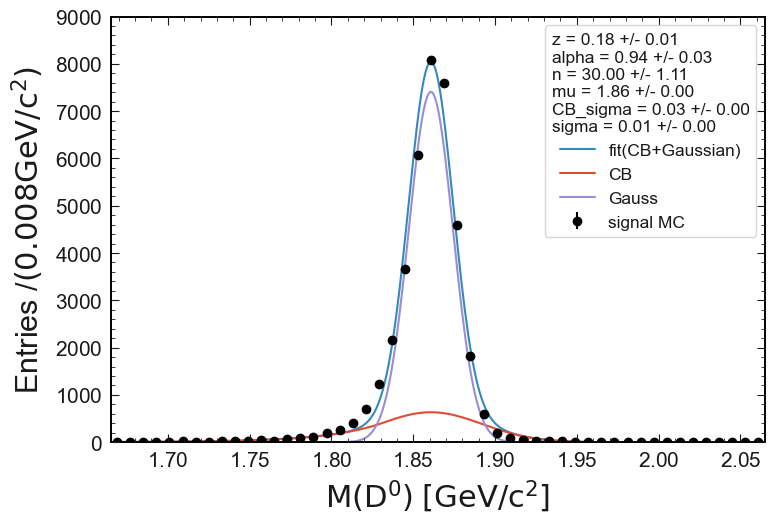

In [183]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, unbinned_crystalball_pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB+Gaussian)")


plt.plot(xm, m.values['z'] * crystalball.pdf(xm, m.values["alpha"], m.values["n"], m.values["mu"], m.values["CB_sigma"])* len(dataset) * dx[0],label="CB")

plt.plot(xm, (1-m.values['z']) * norm.pdf(xm, m.values['mu'], m.values['sigma'])* len(dataset) * dx[0],label="Gauss")



# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,9000)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

In [ ]:
CB 가 normalization 되어 있는지 의문